In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os, sys
os.chdir("..")
import Source.Util.preprocessing as prep
from Source.Util.plots import plot_obs, delta_r, delta_phi, plot_deta_dphi

In [2]:
obs_names = np.array(["p_{T,l1}", "\phi_{l1}", "\eta_{l1}", "\mu_{l1}",
                    "p_{T,l2}", "\phi_{l2}", "\eta_{l2}", "\mu_{l2}",
                  "p_{T,j1}", "\phi_{j1}", "\eta_{j1}", "\mu_{j1}",
                  "p_{T,j2}", "\phi_{j2}", "\eta_{j2}", "\mu_{j2}"])

# Load data

In [3]:
data_raw = np.load("../data/Z_3.npy")
params={"conditional": False, "preprocess": 2, "channels": [0,2,4,5,6,8,9,10,11,12,13,14,15,16,17,18,19], "model": "AutoRegGMM"}

In [4]:
data_raw = prep.preformat(data_raw, params)
data, data_mean, data_std, data_u, data_s, bin_edges, bin_means = prep.preprocess(data_raw, params=params)

# Plots

In [5]:
idx_phi1, idx_eta1, idx_phi2, idx_eta2 = [9,10,13,14]
#idx_phi1, idx_eta1, idx_phi2, idx_eta2 = [1,2,5,6]
dr = delta_r(data_raw, idx_phi1=idx_phi1, idx_eta1=idx_eta1, idx_phi2=idx_phi2, idx_eta2=idx_eta2)
print(np.shape(dr))

(315903,)


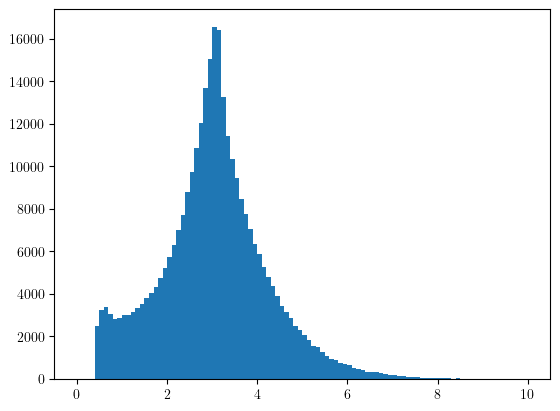

In [6]:
plt.hist(dr, range=[0,10], bins=100)
plt.show()

In [7]:
def getAngle(angle):
    return (angle + np.pi)%(2*np.pi)-np.pi

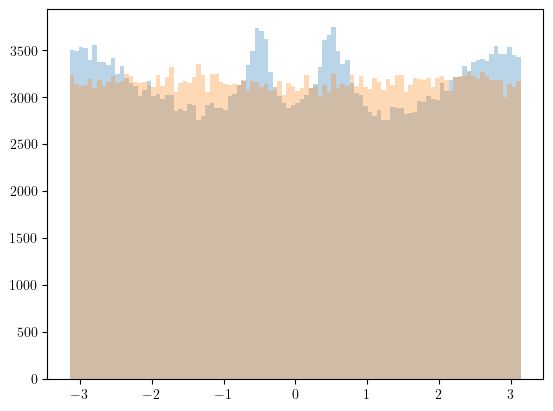

In [8]:
plt.hist(delta_phi(data_raw, 13, 17), bins=100, alpha=.3)
plt.hist(getAngle(data_raw[:,13]+data_raw[:,17]), bins=100, alpha=.3)
plt.show()

In [ ]:
plt.hist(data_raw[:,14]+data_raw[:,18], bins=1)

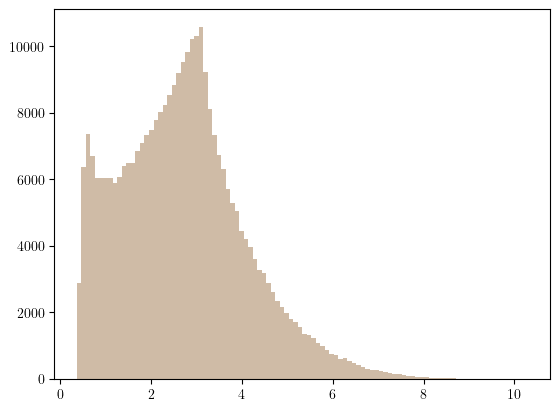

In [9]:
plt.hist(delta_r(data_raw, 13, 14, 17, 18), bins=100, alpha=.3)
diffphi = (data_raw[:,13] - data_raw[:,17] + np.pi)%(2*np.pi)-np.pi
diffeta = data_raw[:,14] - data_raw[:,18]
plt.hist( (diffphi**2 + diffeta**2)**.5, bins=100, alpha=.3)
plt.show()